# checking why the energy is sometimes negative...

In [1]:
import sys,os,os.path
sys.path.append("../../../../") # if you move files around, you need to adjust this!
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

In [19]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 22

import pandas as pd
import numpy  as np
import tables as tb

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import IC.invisible_cities.core.core_functions                   as     coref
import IC.invisible_cities.io.dst_io                           as     dstio
from IC.invisible_cities.cities                 import beersheba as beerfun

from IC.invisible_cities.io.dst_io import load_dsts
from IC.invisible_cities.io.dst_io import load_dst
from IC.invisible_cities.io.pmaps_io import load_pmaps

from tqdm import tqdm

In [ ]:
n100_dir = '/media/e78368jw/T7 Shield/N100_runs/15107/sophronia/trigger2/'
pmap_dir = '/media/e78368jw/T7 Shield/N100_runs/15107/pmaps/'
folder_path = n100_dir + 'ldc' + '1' + '/'
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.h5')]
print('=================================================')
print('NEGATIVE ENERGY MADNESS')
print('=================================================')
q = load_dst(n100_dir + 'ldc1/run_15107_0104_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'RECO', 'Events')
display(load_dst(n100_dir + 'ldc1/run_15107_0104_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'RECO', 'Events'))


NEGATIVE ENERGY MADNESS


,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,72039,1.742936e+09,39,36.779894,28.985958,1,212.125,492.725,0.0,0.0,1273.912250,5.661029,-1.417413,-1.0,NaN,-1,-1.0
1,72039,1.742936e+09,39,36.779894,28.985958,1,-265.925,-201.525,0.0,0.0,1276.345375,7.444304,-4.517760,-1.0,-1.418547e-05,-1,-1.0
2,72039,1.742936e+09,39,36.779894,28.985958,1,57.625,122.525,0.0,0.0,1276.345375,5.150627,-3.125785,-1.0,-9.277920e-06,-1,-1.0
3,72039,1.742936e+09,39,36.779894,28.985958,1,-142.525,-47.525,0.0,0.0,1279.630500,5.096115,5.277097,-1.0,1.564889e-05,-1,-1.0
4,72039,1.742936e+09,39,36.779894,28.985958,1,-389.325,90.925,0.0,0.0,1281.775250,5.943045,-3.181359,-1.0,-1.035510e-05,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,72193,1.742936e+09,29,74.357555,48.673427,1,-81.325,-139.825,0.0,0.0,149.439500,6.901906,-0.007938,-1.0,-2.066010e-08,-1,-1.0
3125,72193,1.742936e+09,29,74.357555,48.673427,1,10.975,29.225,0.0,0.0,149.439500,5.011463,-0.005764,-1.0,-1.486475e-08,-1,-1.0
3126,72193,1.742936e+09,29,74.357555,48.673427,1,212.125,-309.875,0.0,0.0,149.439500,5.098453,-0.005864,-1.0,-1.624381e-08,-1,-1.0
3127,72193,1.742936e+09,29,74.357555,48.673427,1,-250.375,-171.425,0.0,0.0,154.442125,5.020531,2.892402,-1.0,7.907618e-06,-1,-1.0


# LETS LOOK AT THE PMAP

In [28]:
pmap = load_pmaps(pmap_dir + 'ldc1/run_15107_0104_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.irene.h5')
print(pmap)


{72193: 
---------------------
PMap instance
---------------------
Number of S1s: 134
Number of S2s: 64
, 72039: 
---------------------
PMap instance
---------------------
Number of S1s: 124
Number of S2s: 57
, 72053: 
---------------------
PMap instance
---------------------
Number of S1s: 149
Number of S2s: 55
, 72151: 
---------------------
PMap instance
---------------------
Number of S1s: 166
Number of S2s: 3
}


In [61]:
d = pmap[72039].s2s
print(d[9])
print(d[19])
print(d[29])
print(d[39])
print(d[49])
print(d[59])


       ---------------------
       S2 instance
       ---------------------
       Number of samples: 15
       Times: [326.75317 327.4111  328.61307 329.44736 330.49628 331.44748 332.46002
333.57193 334.3822  335.4701  336.41553 337.4156  338.30276 339.5174
340.2449 ] µs
       Time @ max energy: 331.44746875
       Width: 7.0 µs
       Height: 1.8716486692428589 pes
       Energy: 2.4001617431640625 pes
       Charge: 284.48974609375 pes
       RMS: 1.453039306640625 µs


       ---------------------
       S2 instance
       ---------------------
       Number of samples: 23
       Times: [568.75    569.52704 570.43567 571.48987 572.5957  573.48364 574.36017
575.47174 576.55994 577.4472  578.4963  579.4022  580.40643 581.56635
582.3184  583.4519  584.5193  585.51074 586.462   587.48883 588.47046
589.46606 590.52   ] µs
       Time @ max energy: 574.3601875
       Width: 18.0 µs
       Height: 2.8236567974090576 pes
       Energy: 7.404828071594238 pes
       Charge: 536.8196411132

IndexError: tuple index out of range

[[-0.12188551 -0.04943811 -0.19822569 ... -0.19817635 -0.22792162
   0.06357367]
 [ 0.09947308 -0.24578062  0.21647036 ... -0.0677496  -0.10330588
  -0.02709799]
 [ 0.11723083 -0.43962842 -0.11697867 ...  0.13735501 -0.07801481
   0.04938024]
 ...
 [-0.17496796 -0.27516103 -0.01893233 ...  0.07721134 -0.27509314
   0.05010534]
 [-0.20065197 -0.35358784  0.1496332  ...  0.17359406  0.05377854
  -0.12705839]
 [-0.14920987  0.12376192  0.05805728 ... -0.33624452  0.18937796
   0.25314417]]
Done


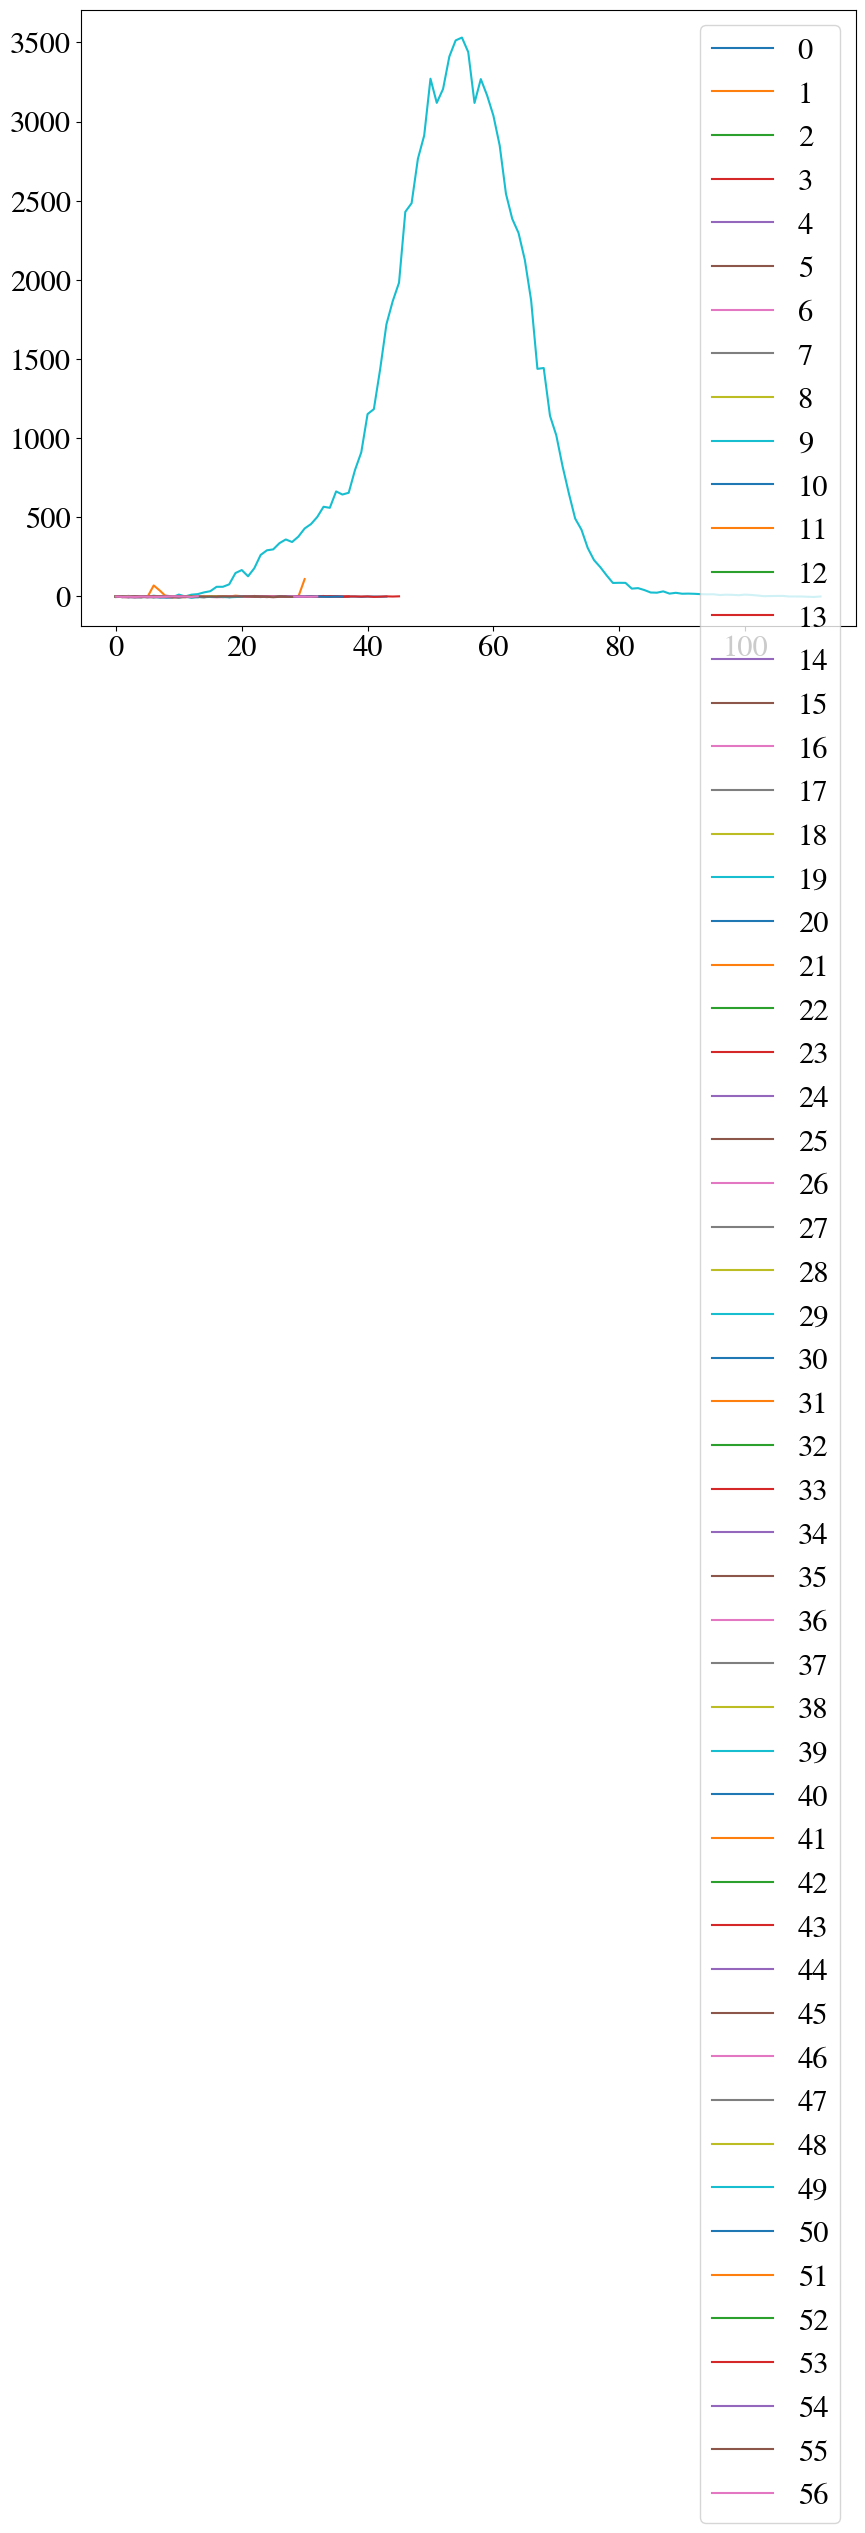

In [60]:
print(d[0].pmts.all_waveforms)
#plt.plot(np.sum(d[1].pmts.all_waveforms, axis = 0))

i = 0
try:
    while True:
        plt.plot(np.sum(d[i].pmts.all_waveforms, axis = 0), label = i)
        plt.legend()
        i += 1
except:
    print('Done')
plt.show()